#Text classification using spacy with tfidfvectorization

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

###### PART A

###### 1.import and finding outliers

In [ ]:
df=pd.read_csv("amazon_alexa.tsv", sep='\t')

In [ ]:
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [ ]:
df.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [ ]:
df.dtypes

rating               int64
date                object
variation           object
verified_reviews    object
feedback             int64
dtype: object

In [ ]:
df.isnull()

,rating,date,variation,verified_reviews,feedback
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
3145,False,False,False,False,False
3146,False,False,False,False,False
3147,False,False,False,False,False
3148,False,False,False,False,False


In [ ]:
df.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f42655b5ad0>,
      dtype=object)

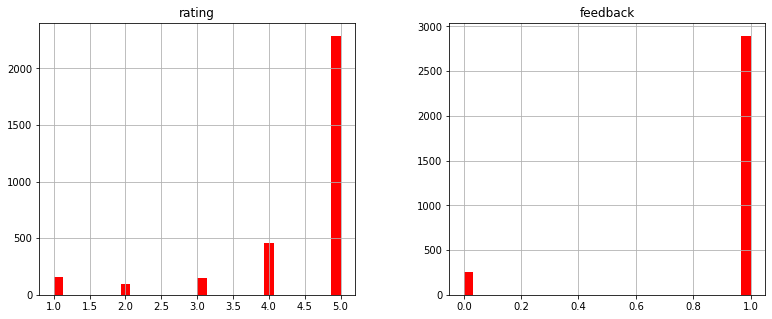

In [ ]:
df.hist(bins=30, figsize=(13,5), color='r')

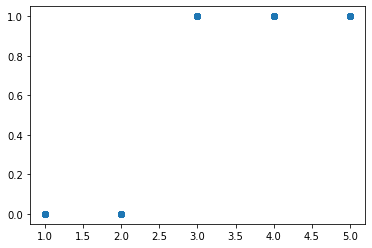

In [ ]:
plt.scatter(df['rating'],df['feedback'])

###### 2.preprocessing

In [ ]:
import spacy

In [ ]:
nlp = spacy.load('de_core_news_sm') 

In [ ]:
import string
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English
import spacy


In [ ]:
punctuations = string.punctuation

nlp = spacy.load('en')
stop_words = spacy.lang.en.stop_words.STOP_WORDS

parser = English()

In [ ]:
nlp



In [ ]:
len(stop_words)



326

In [ ]:
def spacy_tokenizer(sentence):
    
    mytokens = nlp(sentence)

    
    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]

    
    mytokens = [ word for word in mytokens if word not in stop_words and word not in punctuations ]

    
    return mytokens
spacy_tokenizer

<function __main__.spacy_tokenizer>

In [ ]:
spacy_tokenizer(u"Sometimes while playing a game, you can answer")

['play', 'game', 'answer']

In [ ]:
nlp.vocab['can'].is_stop

True

In [ ]:
from sklearn.base import TransformerMixin
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
class predictors(TransformerMixin):
    def transform(self, X, **transform_params):
        
        return [clean_text(text) for text in X]

    def fit(self, X, y=None, **fit_params):
        return self

    def get_params(self, deep=True):
        return {}


def clean_text(text):
    
    return text.strip().lower()

In [ ]:
bow_vector = CountVectorizer(tokenizer = spacy_tokenizer, ngram_range=(1,1))

In [ ]:
tfidf_vector = TfidfVectorizer(tokenizer = spacy_tokenizer)

In [ ]:
from collections import Counter
f = open("amazon_alexa.tsv", "r")     
data = f.read()                   
words = data.split()               
counting = Counter(words)
list_of_word_and_frequency = counting.most_common()
print("Most Commonly used word in Text File is => ", counting.most_common()[0][0])
print("Frequency of most commonly used word in Text File is => ", counting.most_common()[0][1])

Most Commonly used word in Text File is =>  1
Frequency of most commonly used word in Text File is =>  3070


# PART B

###### split the data set into training and test set

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
from sklearn.model_selection import train_test_split

X = df['verified_reviews'] 
ylabels = df['feedback'] 

X_train, X_test, y_train, y_test = train_test_split(X, ylabels, test_size=0.3)

len(y_test)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 15)

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(2205,)
(2205,)
(945,)
(945,)


###### Apply different classification algorithms

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()


pipe = Pipeline([("cleaner", predictors()),
                 ('vectorizer', bow_vector),
                 ('classifier', classifier)])

pipe.fit(X_train,y_train)

Pipeline(steps=[('cleaner', <__main__.predictors object at 0x7f425cd0c190>),
                ('vectorizer',
                 CountVectorizer(tokenizer=<function spacy_tokenizer at 0x7f425caa4320>)),
                ('classifier', LogisticRegression())])

In [ ]:

from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()


pipe = Pipeline([("cleaner", predictors()),
                 ('vectorizer', bow_vector),
                 ('classifier', naive_bayes)])

pipe.fit(X_train,y_train)

Pipeline(steps=[('cleaner', <__main__.predictors object at 0x7f425b5d6fd0>),
                ('vectorizer',
                 CountVectorizer(tokenizer=<function spacy_tokenizer at 0x7f425caa4320>)),
                ('classifier', MultinomialNB())])

In [ ]:
from sklearn import metrics

predicted = pipe.predict(X_test)


print("Logistic Regression Accuracy:",metrics.accuracy_score(y_test, predicted))
print("Logistic Regression Precision:",metrics.precision_score(y_test, predicted))
print("Logistic Regression Recall:",metrics.recall_score(y_test, predicted))

Logistic Regression Accuracy: 0.9238095238095239
Logistic Regression Precision: 0.9287234042553192
Logistic Regression Recall: 0.9943052391799544


In [ ]:
from sklearn import metrics

predicted = pipe.predict(X_test)


print("Naive Bayes Accuracy:",metrics.accuracy_score(y_test, predicted))
print("Naive Bayes Precision:",metrics.precision_score(y_test, predicted))
print("Naive Bayes Recall:",metrics.recall_score(y_test, predicted))

Naive Bayes Accuracy: 0.9259259259259259
Naive Bayes Precision: 0.9297872340425531
Naive Bayes Recall: 0.9954441913439636


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
results = confusion_matrix(y_test, predicted)

In [ ]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': predicted})

In [ ]:
df1

,Actual,Predicted
540,1,1
1581,1,1
2822,1,1
669,1,1
63,1,1
...,...,...
967,1,1
212,1,1
2341,1,1
484,1,1
